In [ ]:
from sko.PSO import PSO
import numpy as np

TR = 1000
np.random.seed(1)
R_g = (np.random.rand(1000)-0.5)*0.1
R_b = (np.random.rand(1000)-0.5)*0.1

def demo_func(x):
    # c = x[:1000]
    g = x[:1000]
    b = x[1000:]
    C = 998
    G = 1
    B = 1
    for t in range(1000):
        tran_loss =  G * abs(g[t]) * 0.02 + B * abs(b[t]) * 0.01
        c =( tran_loss-B*b[t]-G*g[t])/C
        C = C*(1+c) - tran_loss
        G = G * (1+g[t]) * (1+R_g[t])
        B = B * (1+b[t]) * (1+R_b[t])
        if C < 1 or G < 1 or B < 1 or c < -0.9:
            return 0
    
    return -(C+G+B)

pso = PSO(func=demo_func, dim=2000,max_iter = 100000, lb = -0.9)
fitness = pso.run()
# print('best_x is ',pso.gbest_x)
print('best_y is ',-pso.gbest_y)
# print(fitness)
# pso.plot_history()
# pso.


In [ ]:
print('best_y is ',-pso.gbest_y)



In [8]:
from sko.PSO import PSO
import numpy as np

# TR = 1000
np.random.seed(1)
R_g = (np.random.rand(1000)-0.5)*0.1
R_b = (np.random.rand(1000)-0.5)*0.1
penalty_rate = -2
T = 10
def demo_func(x):
    # c = x[:1000]
    g = x[:T]
    b = x[T:]
    C = 1000
    G = 0
    B = 0
    TR = 0
    for t in range(T):
        tran_loss =  abs(g[t]) * 0.01 + abs(b[t]) * 0.02
        c = -tran_loss-b[t]-g[t]
        psnt_return = c + (G + g[t]) * (1+R_g[t]) + (B + b[t]) * (1+R_b[t]) - G - B
        C = C+c
        G = (G + g[t]) * (1+R_g[t])
        B = (B + b[t]) * (1+R_b[t])
        TR += psnt_return
        if C < 0:
            # TR += np.exp(-C)
            TR += C**2 * penalty_rate
        if G < 0:
            # TR += np.exp(-G)

            TR += G**2 *penalty_rate
        if B < 0:
            # TR += np.exp(-B)

            TR += B**2 *penalty_rate
    
    return -TR

pso_lb = [-1000]*T*2
pso_lb[0] = 0
pso_lb[T] = 0
pso_ub = [1000]*T*2

pso = PSO(func=demo_func, dim=2*T,max_iter = 10000,lb= pso_lb,ub= pso_ub)
fitness = pso.run()
# print('best_x is ',pso.gbest_x)
print('best_y is ',-pso.gbest_y)
# print(fitness)
# pso.plot_history()
# pso.


best_y is  [-1866.5914728]


[ 224.18817962  133.75153164 -366.47936357   48.76783067    7.86779961
  802.70457468  184.73760063  -86.11748806 -878.01953706   65.50660726]


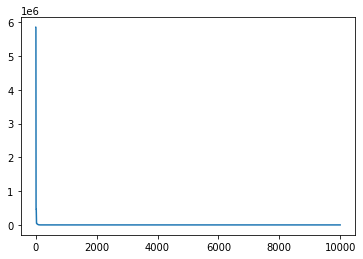

In [10]:
print(pso.gbest_x[:T])
import matplotlib.pyplot as plt
plt.plot(pso.gbest_y_hist)
plt.show()

In [11]:
for i in range(T):
    print(pso.gbest_x[i], pso.gbest_x[i+T])

224.18817961669856 351.46315918075726
133.75153163923247 -12.480234095693621
-366.47936357047485 339.2776289404126
48.76783067351338 19.57411426010571
7.867799605190624 -488.1117591324051
802.704574681118 -218.74966157638843
184.73760062670695 -55.99142552646929
-86.11748806048746 22.589628300022074
-878.019537061152 828.7825628006565
65.50660725579594 -100.15290874261309
